<a href="https://colab.research.google.com/github/IgnacioVilar/Entrega-Analtica-Empresarial/blob/main/Trabajo_Final_Anal%C3%ADtica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COMIENZO DEL PROGRAMA**


Cargar el Dataframe

In [ ]:
import numpy as np
from numpy import*
import matplotlib.pyplot as plt
import pandas as pd
from pandas import*
from sklearn.linear_model import LinearRegression
import seaborn as sns
#EDA
#Recopilación y Carga de Datos
dataset = pd.read_csv('DatosAnalitica.csv', sep = ',') #importación de la base de datos
medidas=dataset.shape #medidas de la base de datos
primerasfilas= dataset.head(10) #para ver el modelo de la tabla con los primeros 10 valores
primerasfilas
infogeneral=dataset.info() 
#Hacer una copia para no perder nada
datos=dataset.copy()
dataset



**EDA**

In [ ]:
#Separar en años, meses, días para luego poder ordenar las columnas.
datos['Order Date']=pd.to_datetime(datos['Order Date'])

datos['Year'] = pd.DatetimeIndex(datos['Order Date']).year
datos['Month'] = pd.DatetimeIndex(datos['Order Date']).month
datos['Day'] = pd.DatetimeIndex(datos['Order Date']).day
datos['yyyymm'] = datos.apply(lambda x: ''.join((str(x['Year']),str(x['Month']))),axis=1)
datos['yyyymm'] = datos['yyyymm'].astype(int)

In [ ]:
# Valores Nulos
datos.isnull().sum()
#Nos devuelve que no hay valores nulos en este dataset

Row ID          0
Order Date      0
Ship Date       0
Country         0
State           0
Product ID      0
Category        0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
Year            0
Month           0
Day             0
yyyymm          0
dtype: int64

In [ ]:
#Ventas por categoría
ventas_categoria = datos[['Category','Sales']].groupby(['Category'],as_index=False).sum() 
ventas_categoria
#Dataset que nos muestra la suma de las ventas de cada categoría

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


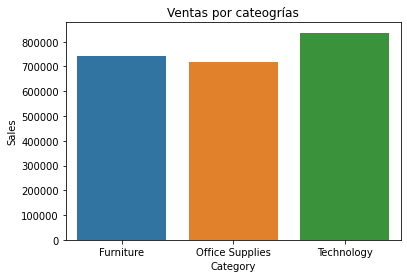

In [ ]:
import seaborn as sns
#Graficamos los datos que vemos anteriormente
sns.barplot(data=ventas_categoria, x="Category", y="Sales")
plt.title("Ventas por cateogrías")
plt.show()

In [ ]:
#Ventas por cada mes de cada año
ventas_mes= datos[['Category','Year','Month','Sales']].groupby(['Category','Year','Month'],as_index=False).sum()
ventas_mes.head() 
#Nos devuelve un dataset ordenado por categoría, año, mes y las ventas por mes
ventas_mes #todo el dataset. 
#A partir de esto vamos a ir sacando las combinaciones de variables.

,Category,Year,Month,Sales
0,Furniture,2014,1,6242.525
1,Furniture,2014,2,1839.658
2,Furniture,2014,3,14573.956
3,Furniture,2014,4,7944.837
4,Furniture,2014,5,6912.787
...,...,...,...,...
139,Technology,2017,8,17619.162
140,Technology,2017,9,26942.603
141,Technology,2017,10,32855.663
142,Technology,2017,11,49918.773


In [ ]:
#Ventas por año
ventas_años = datos[['Year','Sales']].groupby(['Year'],as_index=False).sum()
#Nos devuelve las ventas de cada año. 
ventas_años
#HAY UN PROBLEMA CON EL DATAFRAME

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


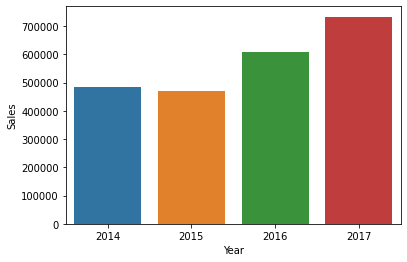

In [ ]:
import seaborn as sns
sns.barplot(data=ventas_años, x='Year', y='Sales')
plt.show()

In [ ]:
#Ventas totales de cada mes, sin tener en cuenta la categoría
ventas_mes_total = datos[['Month','Sales']].groupby(['Month'],as_index=False).sum()
ventas_mes_total

,Month,Sales
0,1,94924.8356
1,2,59751.2514
2,3,205005.4888
3,4,137762.1286
4,5,155028.8117
5,6,152718.6793
6,7,147238.0970
7,8,159044.0630
8,9,307649.9457
9,10,200322.9847


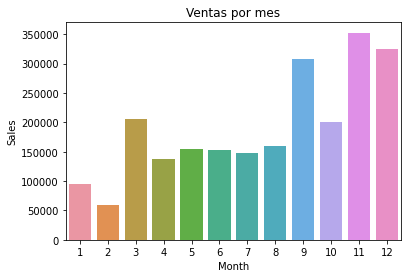

In [ ]:
import seaborn as sns
#Graficamos los datos que vemos anteriormente
sns.barplot(data=ventas_mes_total, x="Month", y="Sales")
plt.title("Ventas por mes")
plt.show()

In [ ]:
#Ventas totales en los meses del año (es por mes, pero tiene en cuenta el año del mes)
ventas_año_mes = datos[['Year','Month','Sales']].groupby(['Year','Month'],as_index=False).sum()
ventas_año_mes

,Year,Month,Sales
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


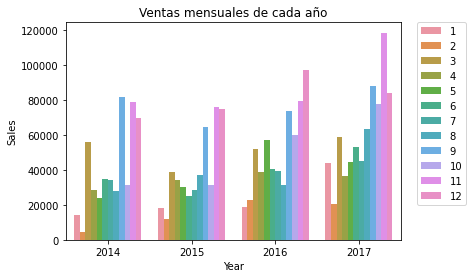

In [ ]:
import seaborn as sns
#Graficamos los datos que vemos anteriormente
sns.color_palette("hls", 9)
sns.barplot(data=ventas_año_mes, x="Year", y="Sales", hue="Month")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title("Ventas mensuales de cada año")
plt.show()

In [ ]:
#Ventas totales de las categorías en cada año
ventas_año_categoria = datos[['Year','Category','Sales']].groupby(['Year','Category'],as_index=False).sum()
ventas_año_categoria

,Year,Category,Sales
0,2014,Furniture,157192.8531
1,2014,Office Supplies,151776.4120
2,2014,Technology,175278.2330
3,2015,Furniture,170518.2370
4,2015,Office Supplies,137233.4630
5,2015,Technology,162780.8090
6,2016,Furniture,198901.4360
7,2016,Office Supplies,183939.9820
8,2016,Technology,226364.1800
9,2017,Furniture,215387.2692


Text(0.5, 1.0, 'Ventas anuales por categoría')

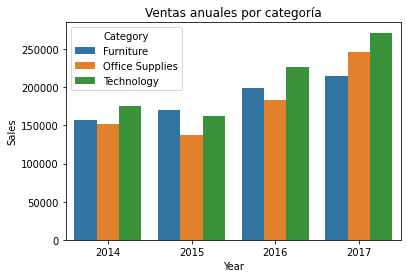

In [ ]:
import seaborn as sns
sns.barplot(data=ventas_año_categoria, x="Year", y="Sales", hue="Category")
plt.title("Ventas anuales por categoría")

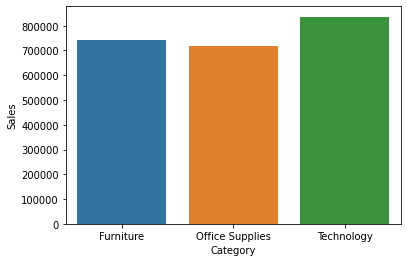

In [ ]:
sns.barplot(data=ventas_categoria, x="Category", y="Sales")
plt.show()

In [ ]:
auxiliar= datos[['Year','Month','yyyymm','Day','Category','Sales']].groupby(['Year','Month','yyyymm','Day','Category'],as_index=False).sum()
auxiliar
#separamos en yyyymm para ver el año y el mes de las ventas por categoría
#Se separa para poder tener los años y los meses juntos, para después poder predecir 201811 (las ventas del black friday)


,Year,Month,yyyymm,Day,Category,Sales
0,2014,1,20141,3,Office Supplies,16.448
1,2014,1,20141,4,Office Supplies,288.060
2,2014,1,20141,5,Office Supplies,19.536
3,2014,1,20141,6,Furniture,2573.820
4,2014,1,20141,6,Office Supplies,685.340
...,...,...,...,...,...,...
2856,2017,12,201712,29,Office Supplies,282.440
2857,2017,12,201712,29,Technology,302.376
2858,2017,12,201712,30,Furniture,323.136
2859,2017,12,201712,30,Office Supplies,299.724


In [ ]:
datos2 = auxiliar.loc[((auxiliar['Year']==2014)&(auxiliar['Month']==11)&(auxiliar['Day']==28))|
                       ((auxiliar['Year']==2015)&(auxiliar['Month']==11)&(auxiliar['Day']==27))|
                       ((auxiliar['Year']==2016)&(auxiliar['Month']==11)&(auxiliar['Day']==25))|
                       ((auxiliar['Year']==2017)&(auxiliar['Month']==11)&(auxiliar['Day']==24)),
                       ['yyyymm','Category','Sales']
                       ]
datos2
#Te agarra las ventas de cada año en el mes 11 de cada categoría
#Suma la cantidad de días que se vendieron cada categoría por mes en cada uno de los años
#sacar las primeras col

,yyyymm,Category,Sales
581,201411,Furniture,808.9320
582,201411,Office Supplies,333.1180
583,201411,Technology,1138.7800
1226,201511,Furniture,1315.3955
1227,201511,Office Supplies,404.7700
1228,201511,Technology,1389.6180
1956,201611,Furniture,1762.9620
1957,201611,Office Supplies,1115.7280
1958,201611,Technology,5099.8610
2765,201711,Furniture,1734.0280


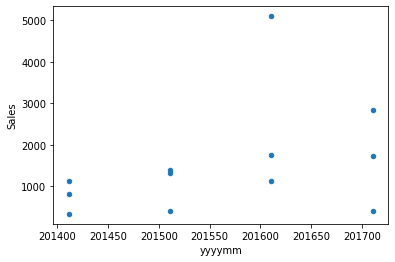

In [ ]:
datos2.plot(kind="scatter", x="yyyymm", y="Sales")

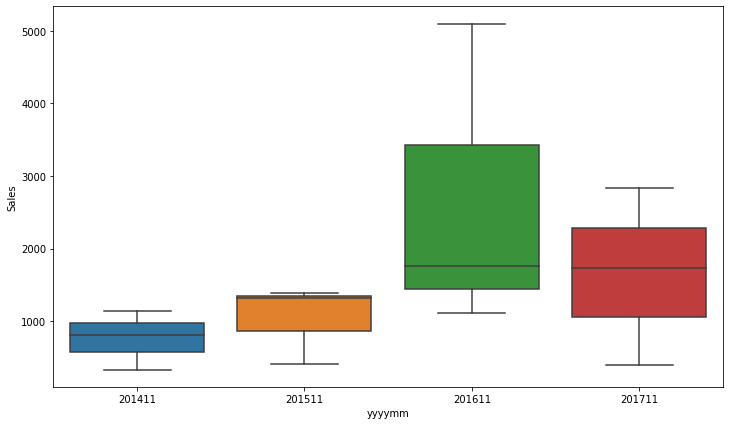

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x='yyyymm',y='Sales',data=datos2)
plt.show()
#Cajas y bigetes para ver datos estadísticos

**REGRESIÓN LINEAL**

In [ ]:
datos2.dtypes

yyyymm        int64
Category     object
Sales       float64
dtype: object

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#Para cambiar los int a float (de stings a number)
categoria = datos2[["Category"]]
#Codifique características categóricas como una matriz numérica única.
encoder = OneHotEncoder() # Esto crea una columna binaria para cada categoría y 
print(len(categoria))
housing_categoria = encoder.fit_transform(categoria)
housing_categoria.toarray()
encoder.categories_
#convierte variables categóricas en ficticias con valores 0 y 1. Muestra si aparece o no la categoría
dy = pd.DataFrame(housing_categoria.toarray()) #Dummies, se crea el dataframe, toarray 
dy.columns = ['Furniture', 'Office Supplies', 'Technology']
dy
dy_datos2 = pd.concat([datos2.reset_index(drop=True), dy.reset_index(drop=True)], axis=1)
dy_datos2.pop('Category')
dy_datos2 
#necesaria para alimentar datos categóricos a muchos estimadores

12


,yyyymm,Sales,Furniture,Office Supplies,Technology
0,201411,808.9320,1.0,0.0,0.0
1,201411,333.1180,0.0,1.0,0.0
2,201411,1138.7800,0.0,0.0,1.0
3,201511,1315.3955,1.0,0.0,0.0
4,201511,404.7700,0.0,1.0,0.0
5,201511,1389.6180,0.0,0.0,1.0
6,201611,1762.9620,1.0,0.0,0.0
7,201611,1115.7280,0.0,1.0,0.0
8,201611,5099.8610,0.0,0.0,1.0
9,201711,1734.0280,1.0,0.0,0.0


Correlación

In [ ]:
correlacion = dy_datos2.corr()
correlacion["Sales"]
#Hallamos la correlación de cada una de las variables teniendo en cuenta la variable 'Sales'

yyyymm             0.377869
Sales              1.000000
Furniture         -0.067817
Office Supplies   -0.197645
Technology         0.265462
Name: Sales, dtype: float64

In [ ]:
ventas_categoria = datos[['Year','Sales']].groupby(['Year'],as_index=False).sum()
ventas_categoria

,Year,Sales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [ ]:
ventas_categoria = dataset[['Category', 'Sales']].groupby(['Category'],as_index=False).sum()
ventas_categoria

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


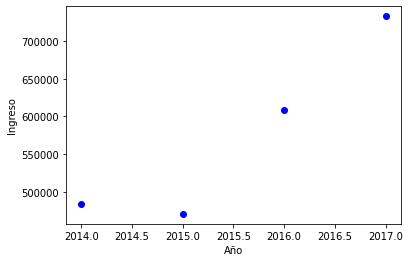

In [ ]:
import matplotlib.pyplot as plt

plt.ylabel("Ingreso")
plt.xlabel("Año")
plt.scatter(ventas_años["Year"], ventas_años["Sales"], color="blue")
plt.show()

**MODELOS**

Modelo con más de una variable

In [ ]:
import matplotlib.pyplot as plt

modelo = dy_datos2[['yyyymm','Technology','Furniture','Office Supplies','Sales']] #traigo del dummies que hice para usar

x = modelo[['yyyymm','Technology','Furniture','Office Supplies']] # independientes
y = modelo[['Sales']] #dependiente
from sklearn.linear_model import LinearRegression

regresion = LinearRegression(fit_intercept = True)

modelo = regresion.fit(x, y)

print('\033[1m',"Intersección (b)",'\033[0m', modelo.intercept_)
print('\033[1m',"Pendiente (m)",'\033[0m', modelo.coef_) 


 Intersección (b)  [-865534.30553517]
 Pendiente (m)  [[   4.3017335   477.83129167 -122.07108333 -355.76020833]]


Modelo con una variable

In [ ]:
from sklearn.linear_model import LinearRegression

regresion = LinearRegression(fit_intercept = True)

x = ventas_años["Year"].values.reshape((-1, 1)) #  independientes
y = ventas_años["Sales"].values.reshape((-1, 1)) #  dependiente

modelo2 = regresion.fit(x, y)

print('\033[1m',"Intersección (b)",'\033[0m', modelo2.intercept_)
print('\033[1m',"Pendiente (m)",'\033[0m', modelo2.coef_)

 Intersección (b)  [-1.77913615e+08]
 Pendiente (m)  [[88557.63603]]


 w_1:  88557.63603000001
 w_2:  88557.63603000001
 R^2:  0.8646662968804718


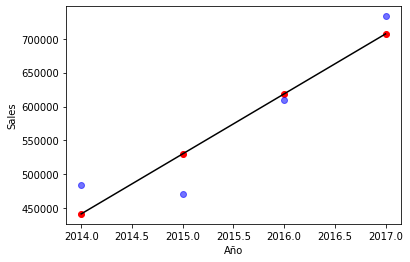

In [ ]:
#Modelo grado 1

xp1 = [[i] for i in range(2014, 2018)]
y1 = modelo2.predict(xp1)

print('\033[1m','w_1:','\033[0m', modelo2.coef_[0][0])
print('\033[1m','w_2:','\033[0m', modelo2.coef_[0][0])
print('\033[1m','R^2:','\033[0m', modelo2.score(xp1, y))


plt.scatter(xp1, y1, color="red")
plt.plot(xp1, y1, color="black")

plt.ylabel("Sales")
plt.xlabel("Año")
plt.scatter(ventas_años["Year"], ventas_años["Sales"], color="blue", alpha=0.55)
plt.show()


 w_1:  -138703454.672787
 w_2:  34431.16157499801
 R^2:  0.9692321384683001


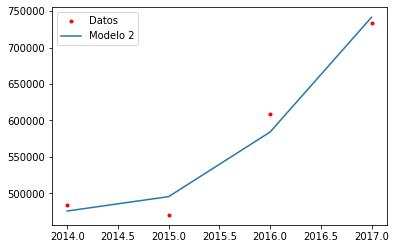

In [ ]:
#Modelo con polinomio de grado 2 

from sklearn.preprocessing import PolynomialFeatures

polinomio_2  = PolynomialFeatures(degree = 2, include_bias = False)
x2 = polinomio_2.fit_transform(x)

modelog2 = LinearRegression(fit_intercept = True)
modelog2.fit(x2, y)

# Parametros de ajuste
print('\033[1m','w_1:','\033[0m', modelog2.coef_[0][0])
print('\033[1m','w_2:','\033[0m', modelog2.coef_[0][1])
print('\033[1m','R^2:','\033[0m', modelog2.score(x2, y))
#Acá vemos que el R^2 se acerca bastante a 1, el modelo se ajustaría bastante bien para un poli grado 2
#Predecimos
xp2 = [[i] for i in range(2014, 2018)]
y2 = modelog2.predict(polinomio_2.fit_transform(xp2))

#Graficamos

plt.plot(x, y, 'r.', label = 'Datos')
plt.plot(xp2, y2, label = 'Modelo 2')
plt.legend(loc = 2)

In [ ]:
y_2 = modelog2.predict(polinomio_2.fit_transform([[2018]]))
y_2 
#prediccion de las ventas para 2018
#hay que transformar el valor para pasarselo al modelo
#ver si realmente se ajusta, si corresponde

array([[967850.11300659]])

 w_1:  -29.585952994058584
 w_2:  -27.661627847879465
 R^2:  0.999999999999387


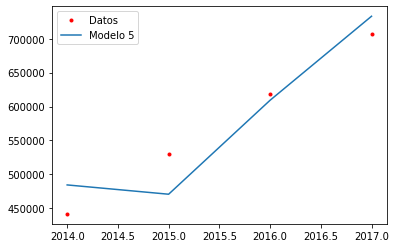

In [ ]:
# Modelo con un polinomio de grado 5
polinomio_5  = PolynomialFeatures(degree = 5, include_bias= False)
x_5 = polinomio_5.fit_transform(x)
modelog5 = LinearRegression(fit_intercept = True)
modelog5.fit(x_5, y)

print('\033[1m','w_1:','\033[0m', modelog5.coef_[0][0])
print( '\033[1m','w_2:','\033[0m', modelog5.coef_[0][1])
print('\033[1m','R^2:','\033[0m', modelog5.score(x_5, y))

#Predecimos
xp5 = [[i] for i in range(2014, 2018)]
y5 = modelog5.predict(polinomio_5.fit_transform(x_p))

plt.plot(x, y1, 'r.', label = 'Datos')
plt.plot(xp5, y5, label = 'Modelo 5')
plt.legend(loc = 2)

#El modelo 5 se ajusta muy bien, pero hay que tener cuidado.
#El R^2 se acerca demasiado a 1 (0.99999...)
#Riesgo de que haya un sobre ajuste.